In [15]:
import numpy as np
import matplotlib.pyplot as plt

class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze object with the provided maze, start_position, and goal_position
        self.maze = maze
        self.maze_height = maze.shape[0]  # Get the height of the maze (number of rows)
        self.maze_width = maze.shape[1]    # Get the width of the maze (number of columns)
        self.start_position = start_position  # Set the start position as a tuple (x, y)
        self.goal_position = goal_position    # Set the goal position as a tuple (x, y)

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5, 5))
        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')
        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[1], self.start_position[0], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[1], self.goal_position[0], 'G', ha='center', va='center', color='green', fontsize=20)
        # Remove ticks and labels from the axes
        plt.xticks([])
        plt.yticks([])
        # Show the plot
        plt.show()
        print("This code block has been run and the Maze class is now available for use.")


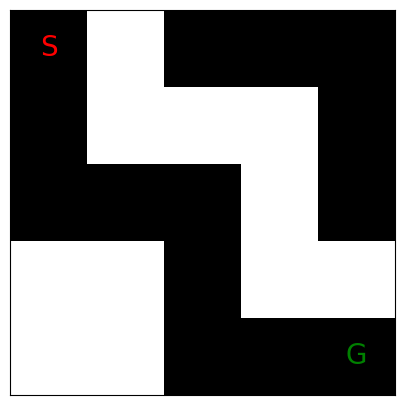

This code block has been run and the Maze class is now available for use.


In [24]:
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 0, 0]
])

maze = Maze(maze_layout, (0,0), (4,4))

maze.show_maze()

In [16]:
import numpy as np
import random as mp  # Changed alias to prevent confusion with other libraries

actions = [(-1, 0),  # Up
           (1, 0),   # Down
           (0, -1),  # Left
           (0, 1)]   # Right

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        # where the rows represent states, columns represent actions
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, len(actions)))  # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate using the given formula
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(len(actions))  # Choose a random action (index 0 to 3)
        else:
            return np.argmax(self.q_table[state])  # Choose the action with the highest Q-value for the given state

    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        self.q_table[state][action] = new_q_value

        # Update Q-value using the Q-learning formula
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        self.q_table[state][action] = new_q_value  # Assign the new Q-value back to the Q-table


In [21]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

print("reward system is defined")


reward system is defined


In [22]:
def finish_episode(agent, maze, current_episode, train=True, wall_penalty=-1, goal_reward=10, step_penalty=-0.1):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if (next_state[0] < 0 or next_state[0] >= maze.maze_height or 
            next_state[1] < 0 or next_state[1] >= maze.maze_width or 
            maze.maze[next_state[0]][next_state[1]] == 1):  # Note: Corrected maze access order
            reward = wall_penalty
            next_state = current_state  # Stay in the current state
        # Check if the agent reached the goal
        elif next_state == maze.goal_position:
            path.append(next_state)  # Append the goal position to the path
            reward = goal_reward
            is_done = True  # End the episode
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(next_state)  # Append the next state to the path
            reward = step_penalty

        episode_reward += reward  # Accumulate the reward
        episode_step += 1  # Increment step count

        if train:
            agent.update_q_table(current_state, action, next_state, reward)  # Update Q-table if training

        current_state = next_state  # Move to the next state

    return episode_reward, episode_step, path  # Return total reward, steps taken, and the path taken


Episode 1:
Learned Path:
(0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 0) -> (2, 1) -> (2, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 4) -> Goal!
Number of steps: 167
Total reward: -99.29999999999978


<Figure size 640x480 with 0 Axes>

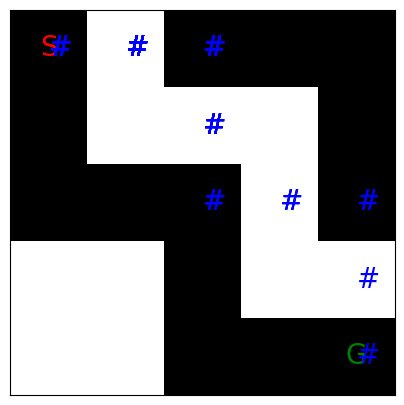

(167, -99.29999999999978)

In [25]:
import matplotlib.pyplot as plt

def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    total_reward = 0
    total_steps = 0
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=False)
        total_reward += episode_reward
        total_steps += episode_step

        # Print the learned path of the agent for this episode
        print(f"Episode {episode + 1}:")
        print("Learned Path:")
        for row, col in path:
            print(f"({row}, {col}) -> ", end='')
        print("Goal!")
        print("Number of steps:", episode_step)
        print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the positions in the learned path with blue '#'
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()
    
    return total_steps, total_reward
    
# Assuming `maze` is already defined
agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)


In [26]:
import matplotlib.pyplot as plt

def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)
        # Store the episode's cumulative reward and the number of steps taken
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    # Plot cumulative rewards
    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')
    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward:.2f}")

    # Plot steps taken
    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')
    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps:.2f}")

    plt.tight_layout()
    plt.show()


The average reward is: 4.79
The average steps is: 15.70


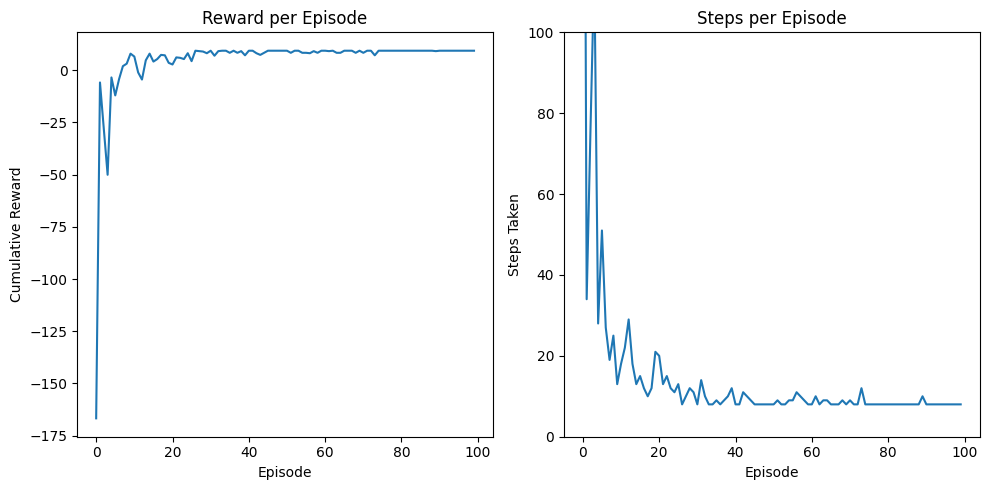

In [27]:
train_agent(agent, maze, num_episodes=100)

Episode 1:
Learned Path:
(0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (4, 3) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (2, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (2, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (2, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 4) -> Goal!
Number of steps: 167
Total reward: -79.49999999999997
Episode 2:
Learned Path:
(0, 0) -> (1, 0) -> 

<Figure size 640x480 with 0 Axes>

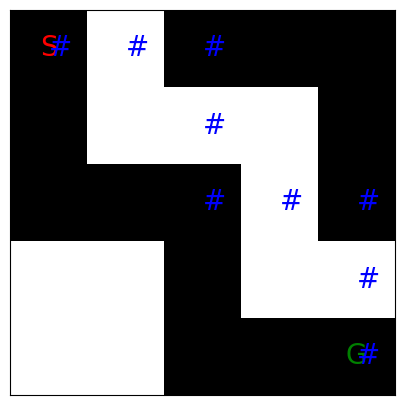

(1459, 539.2000000000003)

In [28]:
test_agent(agent, maze, num_episodes = 100)

The average reward is: 4.96
The average steps is: 15.44


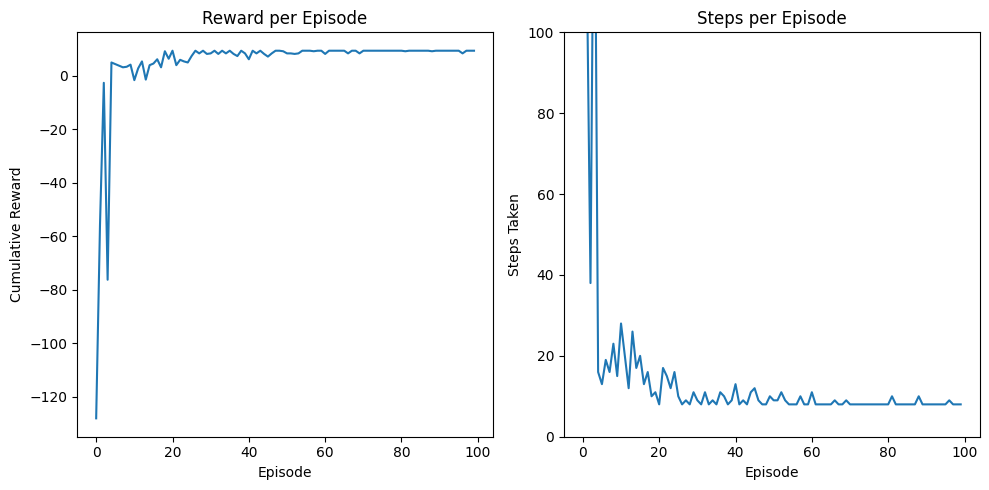

reward system is defined


In [29]:
goal_reward = 0
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)
train_agent(agent, maze, num_episodes=100)

print("reward system is defined")


Episode 1:
Learned Path:
(0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 4) -> Goal!
Number of steps: 107
Total reward: -53.70000000000004
Episode 2:
Learned Path:
(0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 2) -> (3, 2) -> (2, 2) -> (2, 1) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 3) -> 

<Figure size 640x480 with 0 Axes>

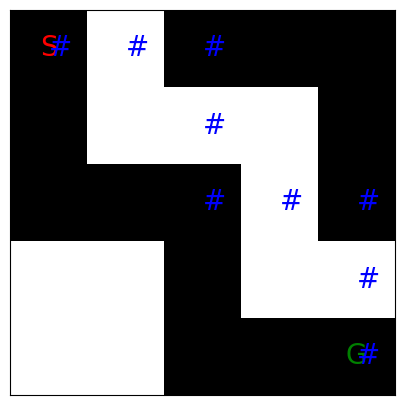

(1220, 670.1999999999995)

In [30]:
test_agent(agent, maze, num_episodes = 100)